# Draft analysis 

---

Group name: DA-Statistics-Nadine-Alena

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 
#### Einführung und Motivation

In einer Welt, die zunehmend alle Bereiche des Lebens von digitaler Interaktionen geprägt sind, hat sich der Weg der zwischenmenschlichen Beziehungen grundlegend gewandelt. Um einzukaufen, Vertragsanliegen zu klären oder neue Leute kennenzulernen, reicht heutzutage ein Klick aufs Handydisplay, es ist nicht mehr notwendig das Haus zu verlassen. Insbesondere die Nutzung von Dating-Plattformen wie Lovoo, Tinder oder Bumble ermöglicht es, potenzielle Partner auf eine Weise zu finden, die weit über herkömmliche Methoden hinausgeht. Bereits jetzt lernen sich laut repräsentativer Umfrage 24% der Paare im Internet bzw. via Dating-App kennen. Damit ist diese Methode zusammen mit dem Kennenlernen über Freunde die häufigste Art und Weise, im Jahr 2023 seinen Partner zu treffen.(Quelle: https://de.statista.com/statistik/daten/studie/1025036/umfrage/umfrage-in-deutschland-zum-ort-des-kennenlernens-des-partners/) Doch durch die vermehrte Nutzung von Dating Plattformen steht jedes Profil vor der Herausforderung, aus der Masse hervorzustechen, positive Reaktionen zu generieren und anderen Nutzern aufzufallen.

In dieser Ära des digitalen Wandels stehen Lovoo-Nutzer vor der Herausforderung, ihre Persönlichkeit und Anziehungskraft in einem begrenzten virtuellen Raum auszudrücken. Die einzige Möglichkeit, die Aufmerksamkeit anderer Nutzer auf sich zu ziehen, besteht in der Ausgestaltung des Nutzerprofils, das nur begrenzten Informationsumfang zulässt. Aber was macht ein erfolgreiches Lovoo-Profil aus? Welche Profilmerkmale generieren genügend Mehrwert, um Andere zur Interaktion mit dem eigenen Profil zu bewegen? Die Antworten auf diese Fragen können nicht nur für Einzelpersonen von Interesse sein, die aktiv nach romantischen Beziehungen suchen, sondern werfen auch tiefergehende Fragen über menschliches Verhalten, Vorlieben und Kommunikationsmuster auf.

#### Datengrundlage und Analyseziel

Durch die Analyse weiblicher Nutzerprofile aus dem Jahr 2015 soll anhand linearer Modelle ermittelt werden, welche Voraussetzungen ein Profil erfüllen muss, um seine Chancen auf virtuelle Interaktion zu erhöhen. Diese Erkenntnisse ermöglichen nicht nur eine personalisierte Optimierung von Profilen für individuellen Erfolg, sondern eröffnen auch Einblicke in soziokulturelle Dynamiken und digitale Kommunikationsstrategien.

Als Datengrundlage dienen die Informationen auf den Accounts verschiedener weiblicher Nutzer, die während der Interaktion mit männlichen Dummy-Profilen ausgelesen wurden. Zu den für diese Analyse relevanten Daten zählen vor allem die Informationsdichte des Profils, die Anzahl der hochgeladenen Bilder, der Profilbesuche und generierten Kisses, sowie das Alter der Person.

#### Forschungsfrage

Anhand der vorliegenden Angaben je Profil soll mithilfe einer linearen Regression im folgenden erforscht werden, welche Profileigenschaften vorliegen sollten, um möglichst viele ProfilVisits zu generieren, was die Wahrscheinlichkeit einer Interaktion mit anderen Nutzern erhöht. Ziel ist es, die Anzahl der Profilbesuche anhand der vorliegenden Nutzerdaten vorherzusagen und damit den wahrscheinlichen Erfolg eines Profils zu bestimmen. 

Zudem wird mithilfe der logistischen Regression untersucht, wie ein Account beschaffen sein muss, um Fans zu generieren, also andere User dazu zu bewegen, dem Profil zu folgen. Ziel ist es, anhand der Nutzerdaten vorherzusagen, ob ein Profil das Potenzial hat, mindestens einen Fan zu generieren oder nicht. 

#### Data Dictionary

In einer verkürzten Version des Data Dictionary aus dem Project Proposal sind nur noch die Variablen dargestellt, die für die Durchführung der Analysen benötigt werden.


In [3]:
import pandas as pd
data = {
    'Name': ['counts_profileVisits', 'counts_details', 'age', 'counts_pictures', 'counts_kisses', 'counts_fans', 'fans'],
    'Description': ['Anzahl der Besuche anderer Nutzer auf dem betrachteten Profil', 'Anteil der auf dem Profil gefüllen Accountdetails', 'Alter des Profilinhabers', 'Anzahl der auf dem Profil hochgeladenen Bilder', 'Anzahl der für das Profil vergebenen Kisses (ähnlich den Likes auf Instagram)', 'Anzahl der Fans des Profils, ähnlich Follower auf anderen Plattformen', 'Binerische Angabe, ob ein Profil über Fans verfügt oder nicht '],
    'Role': ['Response', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Response'],
    'Type': ['numerisch', 'numerisch', 'numerisch', 'numerisch', 'numerisch', 'numerisch', 'nominal'],
    'Format': ['float', 'float', 'float', 'float', 'float','float', 'category']
}


data_dictionary = pd.DataFrame(data)
data_dictionary

,Name,Description,Role,Type,Format
0,counts_profileVisits,Anzahl der Besuche anderer Nutzer auf dem betr...,Response,numerisch,float
1,counts_details,Anteil der auf dem Profil gefüllen Accountdetails,Predictor,numerisch,float
2,age,Alter des Profilinhabers,Predictor,numerisch,float
3,counts_pictures,Anzahl der auf dem Profil hochgeladenen Bilder,Predictor,numerisch,float
4,counts_kisses,Anzahl der für das Profil vergebenen Kisses (ä...,Predictor,numerisch,float
5,counts_fans,"Anzahl der Fans des Profils, ähnlich Follower ...",Predictor,numerisch,float
6,fans,"Binerische Angabe, ob ein Profil über Fans ver...",Response,nominal,category


## Setup

In [4]:
import numpy as np
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE


#warnings.simplefilter(action='ignore', category=FutureWarning)
#alt.data_transformers.disable_max_rows()

## Data

## Import data

In [5]:
URL = 'https://raw.githubusercontent.com/DA-Statistics-Nadine-Alena/project/main/references/LOVOO_Daten.csv'
df = pd.read_csv(URL)

### Data structure

In [6]:
df.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,F,M,25.0,daeni,1.00,4.0,8279.0,239.0,0.0,3.0,...,1.0,2015-04-25T20:43:26Z,1.429995e+09,0.0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22.0,italiana 92,0.85,5.0,663.0,13.0,0.0,0.0,...,1.0,2015-04-26T09:19:35Z,1.430040e+09,0.0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21.0,Lauraaa,0.00,4.0,1369.0,88.0,0.0,2.0,...,1.0,2015-04-06T14:24:07Z,1.428330e+09,0.0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20.0,Qqkwmdowlo,0.12,3.0,22187.0,1015.0,2.0,3.0,...,1.0,2015-04-07T11:21:01Z,1.428406e+09,0.0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21.0,schaessie {3,0.15,12.0,35262.0,1413.0,9.0,12.0,...,1.0,2015-04-06T14:25:20Z,1.428330e+09,0.0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


In [7]:
df.tail()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
3850,F,M,21.0,B**f,0.85,1.0,280.0,15.0,0.0,0.0,...,1.0,2015-04-07T00:08:59Z,1.428365e+09,0.0,1.0,NaN,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN
3851,F,M,20.0,Ma**e,1.00,8.0,1014.0,43.0,3.0,0.0,...,1.0,2015-04-06T07:54:34Z,1.428307e+09,0.0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3852,F,M,20.0,Ma**e,1.00,8.0,1101.0,46.0,3.0,0.0,...,1.0,2015-04-06T07:54:34Z,1.428307e+09,0.0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYVOrW7zgSV+NPGili4nZeREmQ0rAAXCZunTXp9KRLat1...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3853,F,M,23.0,Eni**n,0.96,8.0,8702.0,142.0,0.0,0.0,...,0.0,2015-04-06T15:47:15Z,1.428335e+09,0.0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN
3854,F,M,23.0,Eni**n,0.96,9.0,8904.0,143.0,0.0,0.0,...,0.0,2015-04-19T08:38:08Z,1.429433e+09,0.0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYbrX0C8ToNrsDqLPf+kLsCSuDY0TOhyKSo3Phw98sbl+...,dc186f3855343c9f096c484f6d363aac,NaN


In [8]:
df.describe()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,distance,isFlirtstar,isHighlighted,...,isNew,isOnline,isVip,lang_count,verified,shareProfileEnabled,lastOnlineTime,birthd,crypt,isSystemProfile
count,3428.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3406.000000,3426.000000,3426.000000,...,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3.425000e+03,3426.000000,20.0,2.0
mean,21.995916,0.553987,4.610917,3515.929947,147.919731,2.256859,0.117922,203.072196,0.011384,0.011384,...,0.252481,0.595155,0.019848,1.103036,0.204320,0.964098,1.428903e+09,0.004378,1.0,1.0
std,1.966598,0.328922,4.363296,6171.558587,342.786456,11.659049,1.131675,144.682194,0.106100,0.106100,...,0.434499,0.490934,0.139499,0.569961,0.403263,0.186073,8.214765e+05,0.066033,0.0,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.426592e+09,0.000000,1.0,1.0
25%,20.000000,0.310000,2.000000,362.250000,10.000000,0.000000,0.000000,81.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.428332e+09,0.000000,1.0,1.0
50%,22.000000,0.620000,3.000000,1151.500000,42.000000,0.000000,0.000000,172.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.428387e+09,0.000000,1.0,1.0
75%,24.000000,0.850000,6.000000,3895.750000,134.000000,0.000000,0.000000,317.750000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.429985e+09,0.000000,1.0,1.0
max,28.000000,1.000000,30.000000,58944.000000,6155.000000,241.000000,43.000000,1632.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.430647e+09,1.000000,1.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3855 non-null   object 
 1   genderLooking           3428 non-null   object 
 2   age                     3428 non-null   float64
 3   name                    3428 non-null   object 
 4   counts_details          3426 non-null   float64
 5   counts_pictures         3426 non-null   float64
 6   counts_profileVisits    3426 non-null   float64
 7   counts_kisses           3426 non-null   float64
 8   counts_fans             3426 non-null   float64
 9   counts_g                3426 non-null   float64
 10  flirtInterests_chat     3426 non-null   object 
 11  flirtInterests_friends  3426 non-null   object 
 12  flirtInterests_date     3426 non-null   object 
 13  country                 3426 non-null   object 
 14  city                    3158 non-null   

### Data corrections

Zunächst wird dem DataFrame eine neue Spalte hinzugefügt, die Angibt, ob das in der Zeile repräsentierte Profil über Fans verfügt oder nicht. Grundlage dabei ist die Spalte "counts_fans", ist die dort eingetragene Zahl größer als Eins, so wird das Profil in der neuen Spalte "fans" mit einer 1 gekennzeichnet. Verfügt das Profil laut "counts_fans" über keine Fans, erhält es in der Spalt "fans" eine 0.

In [10]:
df['fans'] = pd.Series(['1' if x > 0 else '0' if x == 0 else '' for x in df['counts_fans']], index=df.index)

df.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile,fans
0,F,M,25.0,daeni,1.00,4.0,8279.0,239.0,0.0,3.0,...,2015-04-25T20:43:26Z,1.429995e+09,0.0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN,0
1,F,M,22.0,italiana 92,0.85,5.0,663.0,13.0,0.0,0.0,...,2015-04-26T09:19:35Z,1.430040e+09,0.0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN,0
2,F,M,21.0,Lauraaa,0.00,4.0,1369.0,88.0,0.0,2.0,...,2015-04-06T14:24:07Z,1.428330e+09,0.0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN,0
3,F,none,20.0,Qqkwmdowlo,0.12,3.0,22187.0,1015.0,2.0,3.0,...,2015-04-07T11:21:01Z,1.428406e+09,0.0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN,1
4,F,M,21.0,schaessie {3,0.15,12.0,35262.0,1413.0,9.0,12.0,...,2015-04-06T14:25:20Z,1.428330e+09,0.0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN,1


Bei genauer Betrachtung der Ausprägungen in der Spalte Gender, so fällt auf, dass die zugrunde liegende csv-Tablle in einigen Zeilen fehlerhaft war, weshalb dort in der entsprechenden Spalte keine der erwarteten Ausprägungen F (= Frau), M (= Mann) und none (= keine Angabe) vermerkt ist. Die fehlerhaft Datenstruktur erstreckt sich über die ganze Zeile der betreffenden Profile, weshalb sie identifiziert und entfernt werden müssen. Hierzu werden die obengenannten Ausprägungen als accepted Values festgelegt, um die übrigen Zeilen mit anderen Werten herauszufiltern.

In [11]:
gender_counts = df['gender'].value_counts()

female_count = gender_counts.get('F', 0)
male_count = gender_counts.get('M', 0)
none_count = gender_counts.get('none', 0)

other_count = gender_counts.sum() - female_count - male_count - none_count

print("Anzahl der 'F'-Werte:", female_count)
print("Anzahl der 'M'-Werte:", male_count)
print("Anzahl der 'none'-Werte:", none_count)
print("Anzahl der anderen Werte:", other_count)


Anzahl der 'F'-Werte: 3428
Anzahl der 'M'-Werte: 0
Anzahl der 'none'-Werte: 0
Anzahl der anderen Werte: 427


In [12]:
accepted_values = ['F', 'M', 'none']

filtered_df = df[df['gender'].isin(accepted_values)]

print("Aktualisiertes DataFrame ohne 'andere Werte':")
filtered_df


Aktualisiertes DataFrame ohne 'andere Werte':


,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile,fans
0,F,M,25.0,daeni,1.00,4.0,8279.0,239.0,0.0,3.0,...,2015-04-25T20:43:26Z,1.429995e+09,0.0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN,0
1,F,M,22.0,italiana 92,0.85,5.0,663.0,13.0,0.0,0.0,...,2015-04-26T09:19:35Z,1.430040e+09,0.0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN,0
2,F,M,21.0,Lauraaa,0.00,4.0,1369.0,88.0,0.0,2.0,...,2015-04-06T14:24:07Z,1.428330e+09,0.0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN,0
3,F,none,20.0,Qqkwmdowlo,0.12,3.0,22187.0,1015.0,2.0,3.0,...,2015-04-07T11:21:01Z,1.428406e+09,0.0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN,1
4,F,M,21.0,schaessie {3,0.15,12.0,35262.0,1413.0,9.0,12.0,...,2015-04-06T14:25:20Z,1.428330e+09,0.0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,F,M,21.0,B**f,0.85,1.0,280.0,15.0,0.0,0.0,...,2015-04-07T00:08:59Z,1.428365e+09,0.0,1.0,NaN,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN,0
3851,F,M,20.0,Ma**e,1.00,8.0,1014.0,43.0,3.0,0.0,...,2015-04-06T07:54:34Z,1.428307e+09,0.0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...,d5a7edbcb59fcb092871bdcde7f142ca,NaN,1
3852,F,M,20.0,Ma**e,1.00,8.0,1101.0,46.0,3.0,0.0,...,2015-04-06T07:54:34Z,1.428307e+09,0.0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYVOrW7zgSV+NPGili4nZeREmQ0rAAXCZunTXp9KRLat1...,d5a7edbcb59fcb092871bdcde7f142ca,NaN,1
3853,F,M,23.0,Eni**n,0.96,8.0,8702.0,142.0,0.0,0.0,...,2015-04-06T15:47:15Z,1.428335e+09,0.0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN,0


Da in den linearen Regressionsmodellen keine Leerzellen bzw. NaN Werte akzeptiert werden, werden die relevanten numerischen Spalten bereinigt, indem die Zeilen mit NaN Werten in den entsprechenden Spalten herausgefiltert werden.

In [13]:
filtered_df=filtered_df.dropna(subset=['counts_profileVisits','counts_pictures','counts_kisses','counts_fans'])

filtered_df = filtered_df.reset_index(drop=True)

In [16]:
df = filtered_df.copy()

Im Anschluss daran wird stichprobenartig überprüft, dass in keinen Spalten unerwartete Werte enthalten sind, die in der späteren Modellierung stören könnten. Daraufhin wird die Struktur der bereinigten Tabelle erneut angezeigt, dabei werden einige in jedem Fall irrelevante Spalten bereits aus der Anzeige entfernt.

In [17]:
df['genderLooking'].value_counts()

M       3083
none     306
F         22
both      15
Name: genderLooking, dtype: int64

In [18]:
df['age'].value_counts()

22.0    619
21.0    518
23.0    512
19.0    457
24.0    456
20.0    448
25.0    313
26.0    100
28.0      1
18.0      1
27.0      1
Name: age, dtype: int64

In [19]:
df['gender'].value_counts()

F    3426
Name: gender, dtype: int64

In [20]:
df = df.drop(["name", "crypt", "counts_g", "freetext", "whazzup", "pictureId", "userId", "isSystemProfile"], axis=1)

In [21]:
df.head()

,gender,genderLooking,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,flirtInterests_chat,flirtInterests_friends,...,lang_de,lang_it,lang_es,lang_pt,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,fans
0,F,M,25.0,1.00,4.0,8279.0,239.0,0.0,True,True,...,True,False,False,False,0.0,1.0,2015-04-25T20:43:26Z,1.429995e+09,0.0,0
1,F,M,22.0,0.85,5.0,663.0,13.0,0.0,True,True,...,True,True,False,False,0.0,1.0,2015-04-26T09:19:35Z,1.430040e+09,0.0,0
2,F,M,21.0,0.00,4.0,1369.0,88.0,0.0,False,False,...,False,False,False,False,0.0,1.0,2015-04-06T14:24:07Z,1.428330e+09,0.0,0
3,F,none,20.0,0.12,3.0,22187.0,1015.0,2.0,True,True,...,False,False,False,False,0.0,1.0,2015-04-07T11:21:01Z,1.428406e+09,0.0,1
4,F,M,21.0,0.15,12.0,35262.0,1413.0,9.0,True,False,...,True,False,False,False,0.0,1.0,2015-04-06T14:25:20Z,1.428330e+09,0.0,1


In [22]:
df.describe()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,isNew,isOnline,isVip,lang_count,verified,shareProfileEnabled,lastOnlineTime,birthd
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3406.000000,3426.000000,3426.000000,3426.0,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3.425000e+03,3426.000000
mean,21.995622,0.553987,4.610917,3515.929947,147.919731,2.256859,203.072196,0.011384,0.011384,0.0,0.741097,0.252481,0.595155,0.019848,1.103036,0.204320,0.964098,1.428903e+09,0.004378
std,1.967097,0.328922,4.363296,6171.558587,342.786456,11.659049,144.682194,0.106100,0.106100,0.0,0.438096,0.434499,0.490934,0.139499,0.569961,0.403263,0.186073,8.214765e+05,0.066033
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.426592e+09,0.000000
25%,20.000000,0.310000,2.000000,362.250000,10.000000,0.000000,81.300000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.428332e+09,0.000000
50%,22.000000,0.620000,3.000000,1151.500000,42.000000,0.000000,172.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.428387e+09,0.000000
75%,24.000000,0.850000,6.000000,3895.750000,134.000000,0.000000,317.750000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.429985e+09,0.000000
max,28.000000,1.000000,30.000000,58944.000000,6155.000000,241.000000,1632.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.430647e+09,1.000000


In [23]:
df['fans'] = df['fans'].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gender                  3426 non-null   object  
 1   genderLooking           3426 non-null   object  
 2   age                     3426 non-null   float64 
 3   counts_details          3426 non-null   float64 
 4   counts_pictures         3426 non-null   float64 
 5   counts_profileVisits    3426 non-null   float64 
 6   counts_kisses           3426 non-null   float64 
 7   counts_fans             3426 non-null   float64 
 8   flirtInterests_chat     3426 non-null   object  
 9   flirtInterests_friends  3426 non-null   object  
 10  flirtInterests_date     3426 non-null   object  
 11  country                 3426 non-null   object  
 12  city                    3158 non-null   object  
 13  location                3418 non-null   object  
 14  distance                

### Variable lists

#### Lineare Regression

In [37]:
y_label = 'counts_profileVisits'

features = df.drop(columns=[y_label,'gender','genderLooking', 'age','flirtInterests_chat','flirtInterests_friends','flirtInterests_date','country','city','location','distance','isFlirtstar','isHighlighted','isInfluencer','isMobile','isNew','isOnline','isVip','lang_count','lang_fr','lang_en','lang_de','lang_it','lang_es','lang_pt','verified','shareProfileEnabled','lastOnlineDate','lastOnlineTime','birthd','fans']).columns
#'counts_details'
X = df[features]

y = df[y_label]

#### Logistische  Regression

In [38]:
y_label_lor = 'fans'

features_lor = df.drop(columns=[y_label_lor, 'counts_fans', 'gender','genderLooking','flirtInterests_chat','flirtInterests_friends','flirtInterests_date','country','city','location','distance','isFlirtstar','isHighlighted','isInfluencer','isMobile','isNew','isOnline','isVip','lang_count','lang_fr','lang_en','lang_de','lang_it','lang_es','lang_pt','verified','shareProfileEnabled','lastOnlineDate','lastOnlineTime','birthd']).columns

X_lor = df[features_lor]

y_lor = df[y_label_lor]

### Data splitting

#### Lineare Regression

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [40]:
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

#### Logistische Regression

In [41]:
X_train_lor, X_test_lor, y_train_lor, y_test_lor = train_test_split(X_lor, y_lor,test_size=0.2,random_state=42)

In [42]:
df_train_lor = pd.DataFrame(X_train_lor.copy())
df_train_lor = df_train_lor.join(pd.DataFrame(y_train_lor))

## Linear Regression

## Analysis

### Descriptive statistics

In [43]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
counts_details,2740.0,0.553296,0.328496,0.0,0.31,0.62,0.85,1.0
counts_pictures,2740.0,4.620073,4.361264,0.0,2.00,3.00,6.00,30.0
counts_kisses,2740.0,146.070803,353.817951,0.0,10.00,39.50,132.00,6155.0
counts_fans,2740.0,2.186496,11.801258,0.0,0.00,0.00,0.00,241.0
counts_profileVisits,2740.0,3427.166788,6145.474818,0.0,356.00,1113.00,3798.50,58944.0


Die Tabelle lässt erkennen, dass die Daten einiger Variablen deutlich ungleich verteilt sind. Während der Anteil der auf dem Profil gegebenen Informationen noch recht gleichmäßig zwischen 0 und 1 liegt, scheint die Variable counts_prictures bereits rechtsschiefe Tendenzen aufzuweisen. Der Durchschnitt ist verglichen mit dem 50% Quartil leicht höher, der Abstand zwischen dem 25%-Quartil und dem 50%-Quartil ist dabei kleiner als der zwischen diesem und dem 75%-Quartil. Zudem liegt der Maximalwert 24 Bilder über dem 75%-Qaurtil, was auf Ausreißer nach rechts hindeutet.

Ein ähnliches, noch verstärktes Bild zeichnet sich bei der Variable counts_kisses. Auch hier liegt eine rechtsschiefe Verteilung vor. Der Abstand zwischen dem 75%-Quartil und dem Maximalwert ist dabei aber viel deutlicher und könnte sich stark auf die Qualität des Modells auswirken, weshalb die Auswirkung möglicher Ausreißer in jedem Fall näher betrachtet werden sollte.

Counts_fans weist eine sehr extreme Rechtsschiefe auf, bei der die Accounts ohne Fans deutlich ins Gewicht Fallen. Doch auch hier lässt der Maximalwert wieder auf Ausreißer schließen, die weit über dem durchschnittlichen Niveau der Variable liegen.

Die Responsevariable counts_profileVisits verhält sich sehr ähnlich den counts_kisses. Auch hier ist die Verteilung rechtsschief, der Mittelwert liegt über dem 50%-Quartil und der Maximalwert liegt deutlich über dem der Quartile.

Da die Daten innerhalb d

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2740 entries, 2872 to 3174
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   counts_details        2740 non-null   float64
 1   counts_pictures       2740 non-null   float64
 2   counts_kisses         2740 non-null   float64
 3   counts_fans           2740 non-null   float64
 4   counts_profileVisits  2740 non-null   float64
dtypes: float64(5)
memory usage: 193.0 KB


In [45]:
df_train.head()

,counts_details,counts_pictures,counts_kisses,counts_fans,counts_profileVisits
2872,0.65,1.0,31.0,0.0,1308.0
776,1.00,7.0,95.0,1.0,5663.0
2090,0.38,2.0,33.0,0.0,330.0
2183,0.00,4.0,27.0,0.0,1293.0
2302,0.92,5.0,6.0,0.0,436.0


In [86]:
df_train.tail()

,counts_details,counts_pictures,counts_kisses,counts_fans,counts_profileVisits
1095,0.65,5.0,263.0,0.0,5048.0
1130,0.40,1.0,0.0,0.0,8.0
1294,0.00,2.0,26.0,0.0,1157.0
860,0.96,5.0,137.0,0.0,3931.0
3174,0.88,5.0,10.0,0.0,519.0


### Exploratory data analysis

In [89]:
alt.Chart(df_train).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=['counts_profileVisits','counts_kisses','counts_pictures','counts_fans', 'counts_details'])

alt.RepeatChart(...)

In den Charts wird deutlich, dass sich die Werte in den Bins stark konzentrieren. 

In [49]:
alt.Chart(df_train).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['counts_profileVisits','counts_pictures','counts_kisses','counts_fans', 'counts_details'],
    column=['counts_profileVisits','counts_pictures','counts_kisses','counts_fans', 'counts_details']
).interactive()

alt.RepeatChart(...)

### Relationships

In [50]:
corr = df_train.corr()
corr[y_label].sort_values(ascending=False)

counts_profileVisits    1.000000
counts_kisses           0.856886
counts_pictures         0.431097
counts_details          0.157249
counts_fans             0.138732
Name: counts_profileVisits, dtype: float64

In der Korrelationsmatrix wird der Einfluss der verschiedenen Predictorvariablen auf die Responsevariable dargestellt. Eine Korrelation von 1 bzw. -1 würde dabei auf eine perfekte lineare Beziehung hindeuten.

Alle Werte der Matrix sind positiv, was beudeutet, dass hier ausschließlich positive Beziehungen vorliegen. Steigt die eine Variable an, so wird auch ein Anstieg der anderen erwartet. Die Korreltaion zwischen den Variablen counts_kisses und der Responsevariable counts_profilVisits ist dabei am stärksten, gefolgt von counts_pictures. Der Einfluss von Accountdetails und Fananzahl auf die Profilbesuche ist im Vergleich eher gering. Selbige Aussage wird durch die Farbgebung in der unteren Darstellung bestätigt (siehe Spalte counts_profilVisits.

In [51]:
corr.style.background_gradient(cmap='Reds')

,counts_details,counts_pictures,counts_kisses,counts_fans,counts_profileVisits
counts_details,1.000000,0.344652,0.128825,0.085766,0.157249
counts_pictures,0.344652,1.000000,0.370948,0.099914,0.431097
counts_kisses,0.128825,0.370948,1.000000,0.136999,0.856886
counts_fans,0.085766,0.099914,0.136999,1.000000,0.138732
counts_profileVisits,0.157249,0.431097,0.856886,0.138732,1.000000


## Model

### Select model

In [52]:
reg = LinearRegression()

### Training and validation

In [53]:
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error') *-1

In [54]:
df_scores = pd.DataFrame({"lr": scores})

df_scores.index += 1

df_scores.style.background_gradient(cmap='Reds')

,lr
1,8931110.524735
2,9962834.059900
3,6978792.581109
4,10421949.475879
5,12093504.882890


In [55]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
)

alt.Chart(...)

In [56]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,9.677638e+06,1.891614e+06,6.978793e+06,8.931111e+06,9.962834e+06,1.042195e+07,1.209350e+07


### Fit model

In [57]:
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
intercept = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )
intercept

,Name,Coefficient
0,Intercept,449.362292


In [59]:
slope = pd.DataFrame({
    "Name": features,
    "Coefficient": reg.coef_})
    
slope

,Name,Coefficient
0,counts_details,151.238371
1,counts_pictures,179.913284
2,counts_kisses,14.007337
3,counts_fans,7.706145


In [60]:
table = pd.concat([intercept, slope], ignore_index=True, sort=False)

round(table, 4)

,Name,Coefficient
0,Intercept,449.3623
1,counts_details,151.2384
2,counts_pictures,179.9133
3,counts_kisses,14.0073
4,counts_fans,7.7061


### Evaluation on test set

In [61]:
y_pred = reg.predict(X_test)

In [62]:
r2=r2_score(y_test, y_pred).round(4)
r2

0.7631

In [63]:
mse=mean_squared_error(y_test, y_pred).round(3)
mse

9288196.022

In [64]:
rmse=mean_squared_error(y_test, y_pred, squared=False).round(3)
rmse

3047.654

In [65]:
mae=mean_absolute_error(y_test, y_pred).round(3)
mae

1613.298

In [70]:
num_features_to_keep = 3

model = LinearRegression()

features_to_exclude = ["counts_fans"]


rfe = RFE(model, n_features_to_select=num_features_to_keep)
X_train_filtered = X_train.drop(features_to_exclude, axis=1)


rfe.fit(X_train_filtered, y_train)


X_train_selected = rfe.transform(X_train_filtered)
X_test_selected = X_test.drop(features_to_exclude, axis=1)


model.fit(X_train_selected, y_train)


y_pred = model.predict(X_test_selected)


r2 = r2_score(y_test, y_pred)

print(f"R^2 mit bestimmten Features ausgeschlossen: {r2}")


R^2 mit bestimmten Features ausgeschlossen: 0.7630068919381799


C:\Users\vette\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Logistische Regression

## Analyse

### Descriptive statistics

In [699]:
df_train_lor.head()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,fans
2872,23.0,0.65,1.0,1308.0,31.0,0
776,19.0,1.00,7.0,5663.0,95.0,1
2090,22.0,0.38,2.0,330.0,33.0,0
2183,22.0,0.00,4.0,1293.0,27.0,0
2302,23.0,0.92,5.0,436.0,6.0,0


In [700]:
df_train_lor.tail()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,fans
1095,21.0,0.65,5.0,5048.0,263.0,0
1130,21.0,0.40,1.0,8.0,0.0,0
1294,20.0,0.00,2.0,1157.0,26.0,0
860,21.0,0.96,5.0,3931.0,137.0,0
3174,20.0,0.88,5.0,519.0,10.0,0


In [701]:
df_train_lor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 2872 to 3174
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   2740 non-null   float64 
 1   counts_details        2740 non-null   float64 
 2   counts_pictures       2740 non-null   float64 
 3   counts_profileVisits  2740 non-null   float64 
 4   counts_kisses         2740 non-null   float64 
 5   fans                  2740 non-null   category
dtypes: category(1), float64(5)
memory usage: 195.8 KB


In [702]:
df_train_lor.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2740.0,22.019708,1.960633,18.0,20.00,22.00,24.00,28.0
counts_details,2740.0,0.553296,0.328496,0.0,0.31,0.62,0.85,1.0
counts_pictures,2740.0,4.620073,4.361264,0.0,2.00,3.00,6.00,30.0
counts_profileVisits,2740.0,3427.166788,6145.474818,0.0,356.00,1113.00,3798.50,58944.0
counts_kisses,2740.0,146.070803,353.817951,0.0,10.00,39.50,132.00,6155.0


### Exploratory data analysis

In [703]:
selected_columns = ['counts_profileVisits', 'age', 'counts_details', 'counts_pictures', 'counts_kisses']
grouped_describe = df_train_lor.groupby(by=['fans']).describe().T.loc[selected_columns]
grouped_describe

/var/folders/ch/yynr7jh16cg5w_lx6z40v6fh0000gn/T/ipykernel_11268/4233502492.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_describe = df_train_lor.groupby(by=['fans']).describe().T.loc[selected_columns]


fans                                   0             1
counts_profileVisits count   2110.000000    630.000000
                     mean    2567.245498   6307.220635
                     std     4944.331588   8467.651424
                     min        0.000000      0.000000
                     25%      291.250000    888.000000
                     50%      866.500000   3194.000000
                     75%     2551.000000   8231.500000
                     max    58944.000000  52884.000000
age                  count   2110.000000    630.000000
                     mean      22.074882     21.834921
                     std        1.953486      1.974734
                     min       18.000000     19.000000
                     25%       21.000000     20.000000
                     50%       22.000000     22.000000
                     75%       24.000000     23.000000
                     max       28.000000     26.000000
counts_details       count   2110.000000    630.000000
                     mean       0.513559      0.686381
                     std        0.331156      0.281354
                     min        0.000000      0.000000
                     25%        0.230000      0.540000
                     50%        0.580000      0.770000
                     75%        0.810000      0.920000
                     max        1.000000      1.000000
counts_pictures      count   2110.000000    630.000000
                     mean       4.130332      6.260317
                     std        3.846704      5.450939
                     min        0.000000      0.000000
                     25%        2.000000      3.000000
                     50%        3.000000      5.000000
                     75%        5.000000      8.000000
                     max       30.000000     30.000000
counts_kisses        count   2110.000000    630.000000
                     mean     104.836493    284.173016
                     std      267.948585    528.768278
                     min        0.000000      0.000000
                     25%        7.000000     30.250000
                     50%       31.000000    105.500000
                     75%       95.000000    304.000000
                     max     4527.000000   6155.000000

In [704]:
charts = []
for column in selected_columns:
    chart = alt.Chart(df_train_lor).mark_area(
        opacity=0.5,
        interpolate='step'
    ).encode(
        alt.X(column, bin=alt.Bin(maxbins=40)),
        alt.Y('count()', stack=None),
        alt.Color('fans:N'),
    ).properties(width=150, height=150, title=f'Histogram for {column}')

    charts.append(chart)

alt.vconcat(*[alt.hconcat(*charts[i:i+3]) for i in range(0, len(charts), 3)])

alt.VConcatChart(...)

In [705]:
charts = []
for column in selected_columns:
    chart = alt.Chart(df_train_lor).mark_boxplot(
        size=50,
        opacity=0.7
    ).encode(
        x='fans:N',
        y=alt.Y(f'{column}:Q', scale=alt.Scale(zero=True)),
        color='fans:N'
    ).properties(width=150, height=150, title=f'Boxplot for {column}')

    charts.append(chart)

alt.vconcat(*[alt.hconcat(*charts[i:i+2]) for i in range(0, len(charts), 2)])

alt.VConcatChart(...)

### Relationships

Für die Variable Age liegt ein eher geringerer Zusammenhang vor. Aus diesem Grund wird diese aus dem Modell genommen und lediglich die anderen 4 Varibalen für das Modell betrachtet. 

In [706]:
features_model_lor = ['counts_profileVisits', 'age', 'counts_details', 'counts_pictures', 'counts_kisses']

X_train_lor = X_train_lor[features_model_lor] 
X_test_lor = X_test_lor[features_model_lor]

## Model

### Select model

In [707]:
clf = LogisticRegression()

### Training and validation

In [708]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_lor, y_train_lor)

LogisticRegression(max_iter=1000)

In [709]:
clf.intercept_

array([-0.09576953])

In [710]:
clf.coef_

array([[ 7.09008624e-05, -1.06499177e-01,  1.39643716e+00,
         2.32111606e-02, -6.14032865e-05]])

### Fit model

In [711]:
clf.score(X_train_lor, y_train_lor)

0.7766423357664234

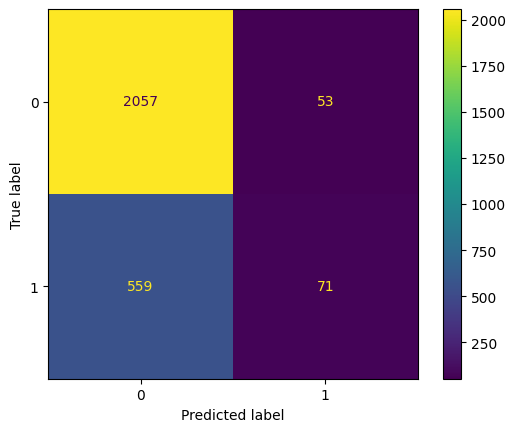

In [712]:
ConfusionMatrixDisplay.from_estimator(clf, X_train_lor, y_train_lor);

In [713]:
y_pred = clf.predict(X_train_lor)

print(classification_report(y_train_lor, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.79      0.97      0.87      2110
         Yes       0.57      0.11      0.19       630

    accuracy                           0.78      2740
   macro avg       0.68      0.54      0.53      2740
weighted avg       0.74      0.78      0.71      2740



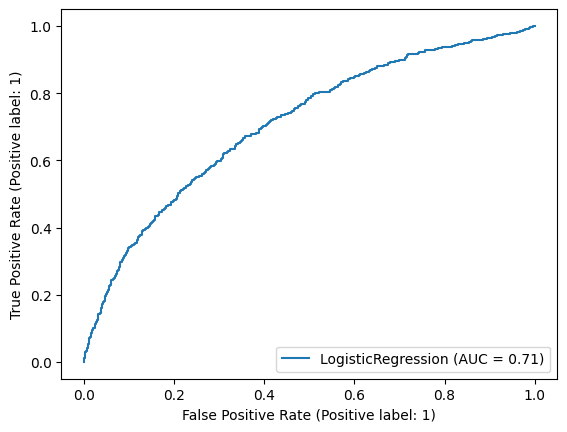

In [714]:
RocCurveDisplay.from_estimator(clf, X_train_lor, y_train_lor) ;

In [715]:
y_score = clf.predict_proba(X_train_lor)[:, 1]
roc_auc_score(y_train_lor, y_score)

0.7084841645979087

### Evaluation on test set

In [716]:
pred_proba = clf.predict_proba(X_train_lor)

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2110
           1       0.54      0.23      0.32       630

    accuracy                           0.78      2740
   macro avg       0.67      0.59      0.60      2740
weighted avg       0.74      0.78      0.74      2740



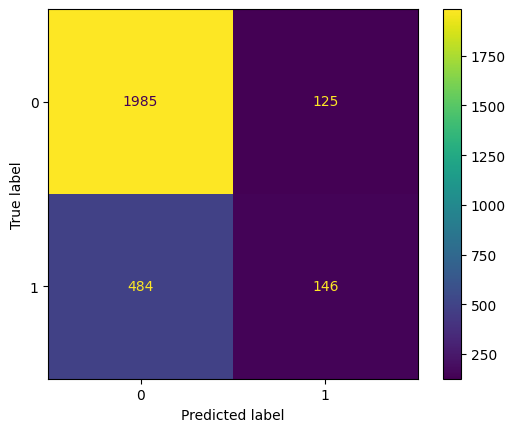

In [719]:
y_train_lor = y_train_lor.astype(int)

df_04 = pd.DataFrame({'y_pred': pred_proba[:,1] > .4})

df_04['y_pred'] = df_04['y_pred'].astype(int)

ConfusionMatrixDisplay.from_predictions(y_train_lor, df_04['y_pred'])
print(classification_report(y_train_lor, df_04['y_pred']))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2110
           1       0.57      0.11      0.19       630

    accuracy                           0.78      2740
   macro avg       0.68      0.54      0.53      2740
weighted avg       0.74      0.78      0.71      2740



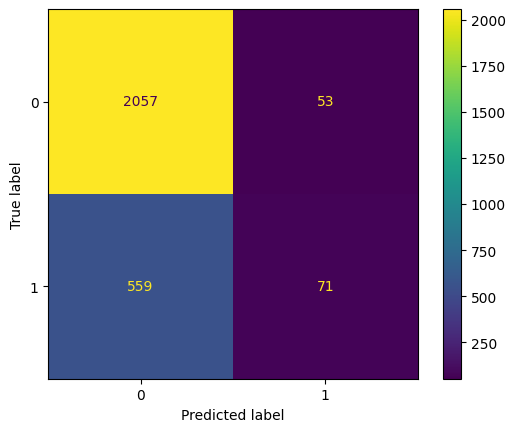

In [720]:
df_05 = pd.DataFrame({'y_pred': pred_proba[:,1] > .5})

df_05['y_pred'] = df_05['y_pred'].astype(int)

ConfusionMatrixDisplay.from_predictions(y_train_lor, df_05['y_pred'])
print(classification_report(y_train_lor, df_05['y_pred']))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2110
           1       0.60      0.04      0.07       630

    accuracy                           0.77      2740
   macro avg       0.69      0.52      0.47      2740
weighted avg       0.74      0.77      0.69      2740



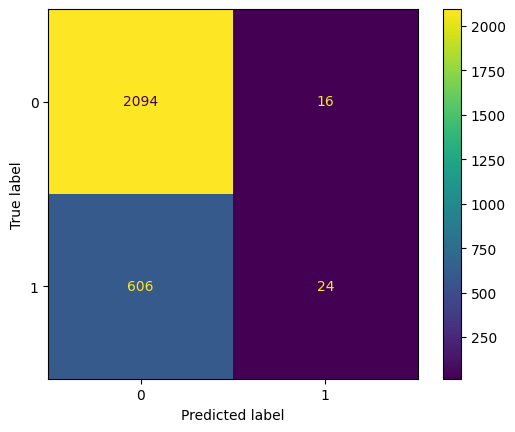

In [721]:
df_07 = pd.DataFrame({'y_pred': pred_proba[:,1] > .7})

df_07['y_pred'] = df_07['y_pred'].astype(int)

ConfusionMatrixDisplay.from_predictions(y_train_lor, df_07['y_pred'])
print(classification_report(y_train_lor, df_07['y_pred']))

### Save model

## Conclusions

### Lineare Regression

### Logistische Regression